# Support Vector Machines

Hyperplane: n-1 subspace in a n-dimensional space. It is a generalization of that concept into n dimensions.

Support Vector Machines classify data by finding the hyperplane that mazimizes the margin between the classes in the training data.

In a two dimensional example with two classes we can think of an hyperplane as the widest band that separats the teo classes.


# Training a Linear Classifier

Use Support Vector Classifier (SVC) to find the hyperplane that maximizes the Margin between the classes.

SVC can work well with multiple classes but for representing it 2 will be used.

**Hyperparameter C:**

Penalty imposed to errors.

Typically we will not be able to perfectly separate classes.

There is a margin between SVC maximizing the margin of the hyperplane and minimizing the misclassification.

SVC control the minimizacion with C parameter

C SMALL : The classifier is ok with missclassified data and therefore bends over backwards to avoid any misclassified data point (high bias but low variance)

C LARGE : The classifier is heavily penalized for misclassified data and therefore bends over backwards to avoid any misclassified data points. (low bias , high variance

c = 1.0 by default




In [53]:
# Load libraries

import numpy as np
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [42]:
# # Load data

iris = load_iris()

features = iris.data[:100, :2] # shape  =  (100, 2)
target = iris.target[:100]     # shape  =  (100,)

In [43]:
# Standardize  features

scaler = StandardScaler()

features_standarized = scaler.fit_transform(features)

In [44]:
# Create support vector classifier

svc = LinearSVC(C=1.0)


In [45]:
# Train model

model = svc.fit(features_standarized, target)

CLASS 0 : BLACK | CLASS 1 : RED


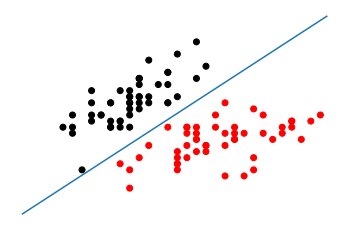

In [62]:
# Plot data points and color using their class

print( "CLASS 0 : BLACK | CLASS 1 : RED")
color = ["black" if c == 0 else "red" for c in target]
plt.scatter(features_standarized[:,0], features_standarized[:,1], c = color)

# Create the hyperplane 

w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0] / w[1])

# Plot the hyperplane 




plt.plot(xx, yy)
plt.axis("off")
plt.show()

In [59]:
# Create new observation

observation = [[-2, 3]]

In [61]:
# Predict class pf new observation

svc.predict(observation)

array([0])

IT IS WELL PREDICTED AS CLASS 0

# Handling Linearly Inseparable Classes Using kernels

Train an extension of SVM using KERNEL FUNCTIONS to create noon linear decision boundaries.

In [77]:
# Load libraries

import numpy as np
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [71]:
# Set randomization seed 

np.random.seed(0)

In [72]:
# Generate two features

features = np.random.randn(200,2)

In [73]:
# Use a XOR gat to generate linearly inseparable classes

target_xor = np.logical_xor(features[:,0]>0, features[:, 1] > 0)

In [74]:
target = np.where(target_xor,0,1)

In [75]:
# Create SVM with a radual basis function kernel

svc = SVC(kernel = "rbf", random_state = 0, gamma = 1, C = 1)

In [87]:
# Train the classifier

model = svc.fit(features, target)
model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [83]:
# Plot observations

def plot_decision_regions(X,y,classifier):
    
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.1, cmap = cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = "+", label = "cl")


In [84]:
# Create SVC with linear kernel

svc_linear = SVC(kernel = "linear", random_state = 0, C=1)

In [85]:
# Train model

svc_linear.fit(features,target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


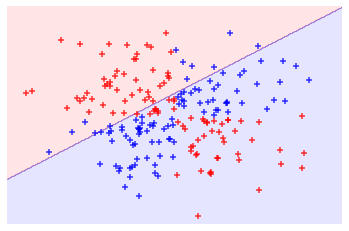

In [86]:
# plot observations hyperplane

plot_decision_regions(features, target, classifier = svc_linear) 
plt.axis("off")
plt.show()

In [88]:
# Create a support vector machine with radial basis function kernel

svc = SVC(kernel="rbf", random_state = 0, gamma = 1, C=1)

In [89]:
# Train the classifier

model = svc.fit(features, target)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


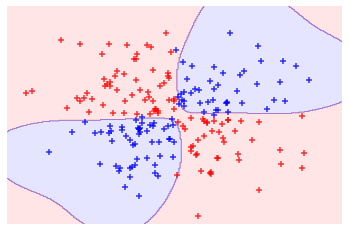

In [91]:
# Plot observations and hyperplane 

plot_decision_regions(features, target, classifier = svc)
plt.axis("off")
plt.show()

# Creating predicted probabilities

set_probability = True and then use predict_proba to see the calibrated probabilities

In [107]:
# Load libraries

import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [108]:
# # Load data

iris = load_iris()

features = iris.data
target = iris.target

In [109]:
# Standardize features 

scaler = StandardScaler()

features_standardized = scaler.fit_transform(features)

In [110]:
# Create SVC with linear kernel

svc_linear = SVC(kernel = "linear", random_state = 0, probability = True)

In [114]:
# Train classifier

model = svc_linear.fit(features_standardized, target)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [115]:
# Create new observation

observation = [[0.4, 0.4, 0.4, 0.4]]

In [116]:
# View predicted probabilities

model.predict_proba(observation)

array([[0.00623541, 0.96973799, 0.0240266 ]])

# Identifying Support vectors

identify which observations are the support vectors of the decision hyperplane.


In [124]:
# Load libraries

import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [125]:
# # Load data

iris = load_iris()

features = iris.data[:100,:]   # shape  =  (100, 4)
target = iris.target[:100]     # shape  =  (100,)

In [126]:
# Standardize features 

scaler = StandardScaler()

features_standardized = scaler.fit_transform(features)

In [127]:
# Create SVC with linear kernel

svc_linear = SVC(kernel = "linear", random_state = 0)

In [128]:
# Train classifier

model = svc_linear.fit(features_standardized, target)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Output the 4 observations which are SVM

In [129]:
# view Support vectors

model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

ViewIndices of the support vector

In [130]:
# Model Support 

model.support_

array([23, 41, 57, 98], dtype=int32)

Number os support vectors belonging to each class

In [131]:
model.n_support_

array([2, 2], dtype=int32)

# Handling Imbalanced Classes

Presence of imbalanced classes

C is the hyperparameter determining the penalty fot missclassifying an observation.


In [133]:
# Load libraries

import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [134]:
# # Load data

iris = load_iris()

features = iris.data[:100,:]   # shape  =  (100, 4)
target = iris.target[:100]     # shape  =  (100,)

In [135]:
# Make features class highly imbalanced by removing first 40 observations

features = features[40:,:] # shape (60, 4)
target = target[40:]       # Shape (60,)

In [140]:
# Create target vector indicating if class 0 otherwise class 1

target = np.where((target == 0), 0, 1)

In [141]:
# Standardize features 

scaler = StandardScaler()

features_standardized = scaler.fit_transform(features)

In [142]:
# Create SVC with linear kernel

svc_linear = SVC(kernel = "linear",class_weight = "balanced", C = 1, random_state = 0)

In [144]:
model = svc_linear.fit(features_standardized, target)
model

SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)